In [18]:
import numpy as np
import pandas as pd
import datetime
from sklearn.utils import shuffle
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt


In [74]:
df = pd.read_csv("Data/train_data.csv")


,Unnamed: 0,PreviousComps,Sex,Equipment,Age,Wilks,Tested,Year,Month,Day,Weekday,BodyweightKg,WilksRangeCat
255764,89325,1,0,1,19.0,283.68,1,2012,1,21,5,83.46,7
255765,347846,2,0,0,28.5,360.42,1,2018,7,7,5,86.40,5
255766,278122,1,0,1,18.5,413.67,1,1988,9,7,2,82.50,4
255767,37563,2,1,0,25.5,337.86,1,2017,3,25,5,71.64,6
255768,97194,6,0,1,19.5,540.14,1,2018,4,19,3,126.41,2


In [78]:
X = df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date', 'Equipment', 'Unnamed: 0'])]
y = df.WilksRangeCat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(len(X_test))
X.columns

76731


Index(['Age', 'BodyweightKg', 'Day', 'Month', 'PreviousComps', 'Sex', 'Tested',
       'Weekday', 'Year'],
      dtype='object')

# KMeans

In [21]:
cluster_assignments = KMeans(n_clusters=14,random_state=1).fit_predict(df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date'])])



In [22]:

df['PredictedCat'] = cluster_assignments

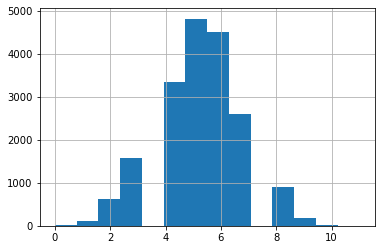

In [23]:
x=3
pd.to_numeric(df[df['PredictedCat']==x].WilksRangeCat).hist(bins=14)

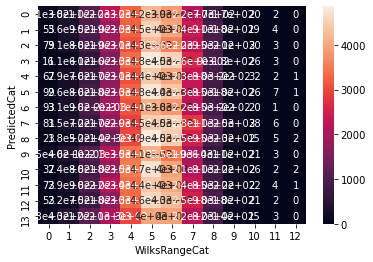

In [24]:
import seaborn as sns
tab = pd.crosstab(df['PredictedCat'],df['WilksRangeCat'])
sns.heatmap(tab,annot=True,annot_kws={"size": 10})
plt.show()

# DecisionTree

In [25]:
clf = tree.DecisionTreeClassifier()


clf = clf.fit(X_train, y_train)

In [26]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2909515059102579


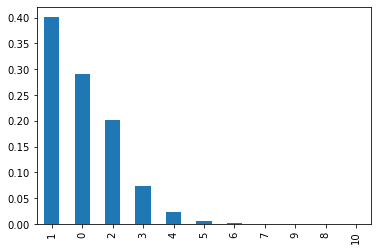

In [27]:
differences = []
for el1, el2 in zip(y_test,y_pred):
    differences.append([abs(el1-el2)])
dif_df = pd.DataFrame(differences, columns = ['Difference'])
dif_df['Difference'].value_counts(normalize=True).plot(kind="bar")
    

# KNN

In [28]:
classifier= KNeighborsClassifier(n_neighbors=200, p=1 )
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.32508373408400776


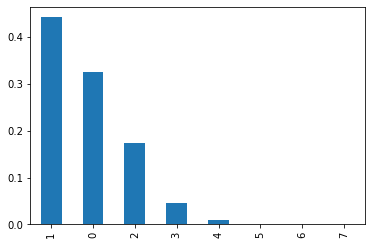

In [29]:
differences = []
for el1, el2 in zip(y_test,y_pred):
    differences.append([abs(el1-el2)])
dif_df = pd.DataFrame(differences, columns = ['Difference'])
dif_df['Difference'].value_counts(normalize=True).plot(kind="bar")

# RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier = RandomForestClassifier(n_estimators = 200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(X_train.columns)

Accuracy: 0.36094929037807405
Index(['Age', 'BodyweightKg', 'Day', 'Month', 'PreviousComps', 'Sex', 'Tested',
       'Weekday', 'Year'],
      dtype='object')


94.95379963769533


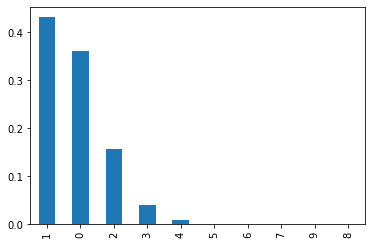

In [81]:
differences = []
for el1, el2 in zip(y_test,y_pred):
    differences.append([abs(el1-el2)])
dif_df = pd.DataFrame(differences, columns = ['Difference'])
dif_df['Difference'].value_counts(normalize=True).plot(kind="bar")
plusminusone = differences.count([0]) + differences.count([1]) + differences.count([2])
length = len(differences)
print((plusminusone/length)*100)



1. feature 1 (0.275408)
2. feature 0 (0.207133)
3. feature 2 (0.145403)
4. feature 8 (0.114614)
5. feature 3 (0.100849)
6. feature 4 (0.083653)
7. feature 7 (0.044289)
8. feature 5 (0.015114)
9. feature 6 (0.013538)
0 : Age
1 : BodyweightKg
2 : Day
3 : Month
4 : PreviousComps
5 : Sex
6 : Tested
7 : Weekday
8 : Year


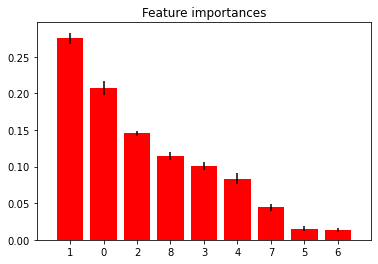

In [54]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)"  % (f + 1, indices[f], importances[indices[f]]))
    
for i in range(len(X_train.columns)):
    print(i, ":", X_train.columns[i])
    
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# RandomTreesClassifier

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

In [51]:
classifier = ExtraTreesClassifier(n_estimators = 200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.35518890670002995


# RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [50]:
classifier = RandomForestRegressor(n_estimators = 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

rmse = mean_squared_error(y_test,y_pred, squared=False)
mse = mean_squared_error(y_test,y_pred, squared=True)
print(mse)
print(rmse)

1.3897615514881174
1.1788814832238725


# Lasso

from sklearn.linear_model import Lasso

lassoM  = Lasso(alpha=0.001).fit(X_train,y_train)
y_pred = lassoM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Ridge

from sklearn.linear_model import Ridge

ridgeM = Ridge(alpha=0.1).fit(X_train,y_train)
y_pred = ridgeM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
differences = []
for el1, el2 in zip(y_test,y_pred):
    differences.append([abs(el1-el2)])
dif_df = pd.DataFrame(differences, columns = ['Difference'])
dif_df['Difference'].value_counts(normalize=True).plot(kind="bar")
    

# SVM

from sklearn.svm import SVC

svm_1 = SVC(kernel='linear', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_poly_1 = SVC(kernel='poly', degree=2, gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_poly_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_rbf_1 = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_rbf_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


model = SVC(decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


model = SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))